In [1]:
import cptac
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statistics
import parse_correlations_dataframe as get_corr
import copy

cptac warning: Your version of cptac (0.8.5) is out-of-date. Latest is 0.8.6. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-147bbc873c03>, line 1)


In [2]:
def find_mutated_genes (cancer_type, min_patients = 10):
    mt = cancer_type.get_somatic_mutation()
    mt_genes = mt.groupby(by="Gene")
    genes = []
    for gene, patients in mt_genes:
        if len(pd.unique(list(patients.index))) >= min_patients:
            genes.append(gene)
    return genes
    
    
    

In [3]:
def find_mutation_corr_effect(cancer_type, gene, corr_dif = True):
    gene_multi = cancer_type.multi_join({'proteomics': gene, 'transcriptomics': gene, 'somatic_mutation': gene}, tissue_type = 'tumor')
    if gene_multi[str(gene + '_proteomics')].isnull().values.any():
        return float("NaN"), float("NaN"), float("NaN")    
    trans = list(gene_multi[str(gene +"_transcriptomics")])
    prot = list(gene_multi[str(gene + '_proteomics')])
    group = []
    for i in gene_multi[str(gene + '_Mutation_Status')]:
        if type(i) == str:
            group.append("mutation")
        else:
            group.append("wt")           
    gene_df = pd.DataFrame({'Type': group, 'Proteomics': prot, 'Transcriptomics': trans})
    is_mut = gene_df['Type'] == 'mutation'
    is_wt = gene_df['Type'] == 'wt'
    gene_cor, gen_pval = scipy.stats.pearsonr(gene_df[is_mut]['Proteomics'], gene_df[is_mut]['Transcriptomics'])
    wt_cor, wt_pval = scipy.stats.pearsonr(gene_df[is_wt]['Proteomics'], gene_df[is_wt]['Transcriptomics'])
    gene_m, gene_b, gene_r, gene_p, gene_se = stats.linregress(gene_df[is_mut]['Proteomics'], gene_df[is_mut]['Transcriptomics'])
    wt_m, wt_b, wt_r, wt_p, wt_se = stats.linregress(gene_df[is_wt]['Proteomics'], gene_df[is_wt]['Transcriptomics'])
    gene_r2 = gene_r ** 2
    wt_r2 = wt_r ** 2
    r2_delta = gene_r2 - wt_r2
    corr_dif = gene_cor - wt_cor
    if corr_dif:
        return abs(corr_dif), r2_delta, gene_df
    else: 
        return gene_cor, wt_cor, gene_df
    

In [4]:
cptac.download("endometrial")
en = cptac.Endometrial()

In [5]:
genes = find_mutated_genes(en)

In [6]:
corr_diffs = []
r2_deltas = []
filtered_genes = []
gene_dfs = []
for gene in genes:
    cor, r2, gene_df = find_mutation_corr_effect(en, gene)
    if not np.isnan(cor):
        corr_diffs.append(cor)
        r2_deltas.append(r2)
        filtered_genes.append(gene)
        gene_dfs.append(gene_df)
en_mutation_effects = pd.DataFrame({'gene': filtered_genes, 'correlation_difference': corr_diffs, "r2_delta" : r2_deltas, "gene_dataframes": gene_dfs})


cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ABCA12 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ABCA13 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ACVR2A (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ADGRG4 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ADGRV1 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: FMN2 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: FSIP2 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: HECW1 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: HYDIN (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: IGFN1 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ZNF469 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ZNF536 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ZNF559 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ZNF729 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ZNF831 (<ipython-input-3-dd3b2f33840f>, line 2)


In [7]:
en_mutation_effects.head()

,gene,correlation_difference,r2_delta,gene_dataframes
0,AHNAK,0.070727,0.126240,Type Proteomics Transcriptomics 0 wt ...
1,AHNAK2,0.093237,0.155454,Type Proteomics Transcriptomics 0 ...
2,ANK1,0.060565,0.004749,Type Proteomics Transcriptomics 0 ...
3,ANK2,0.192810,-0.229408,Type Proteomics Transcriptomics 0 wt ...
4,ANK3,0.035378,-0.063598,Type Proteomics Transcriptomics 0 ...


In [8]:
en_mutation_effects=en_mutation_effects.sort_values(by='correlation_difference', ascending=False, ignore_index=True)

In [9]:
en_mutation_effects.head()

,gene,correlation_difference,r2_delta,gene_dataframes
0,WDFY4,1.100209,-0.317776,Type Proteomics Transcriptomics 0 ...
1,ARID1B,0.892770,-0.161185,Type Proteomics Transcriptomics 0 ...
2,ATRX,0.838282,-0.425650,Type Proteomics Transcriptomics 0 wt ...
3,SPEG,0.812479,-0.337768,Type Proteomics Transcriptomics 0 ...
4,KMT2D,0.729524,0.087515,Type Proteomics Transcriptomics 0 ...


In [10]:
most_affected_genes = list(en_mutation_effects['correlation_difference'][0:10])

print(most_affected_genes)

[1.100208714017844, 0.8927704109710132, 0.8382816676314009, 0.8124786313447919, 0.7295239370775257, 0.5885859698818932, 0.5520101486608533, 0.517554495209436, 0.48472145241890885, 0.48222160973569783]


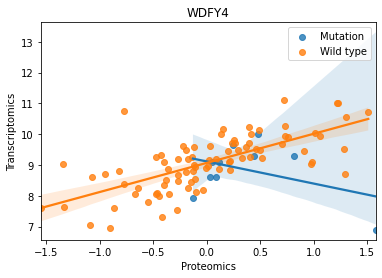

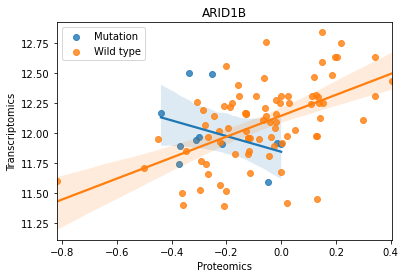

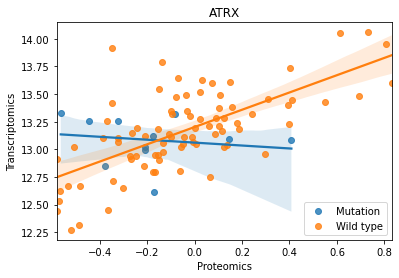

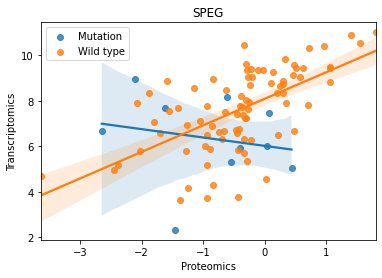

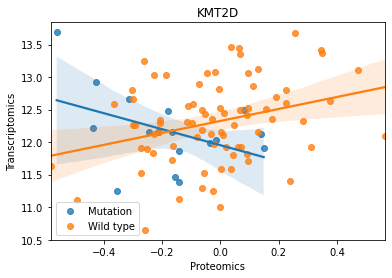

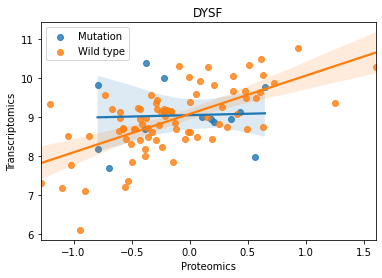

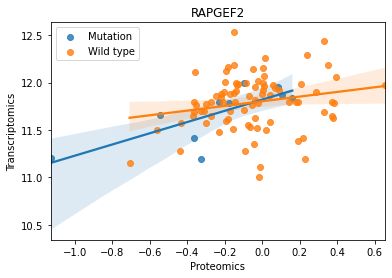

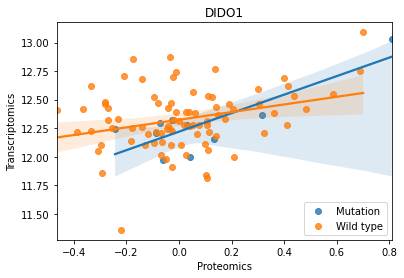

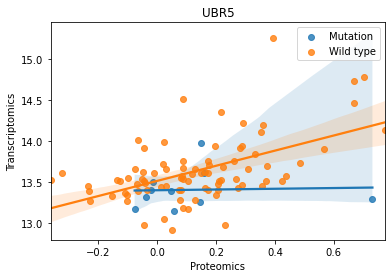

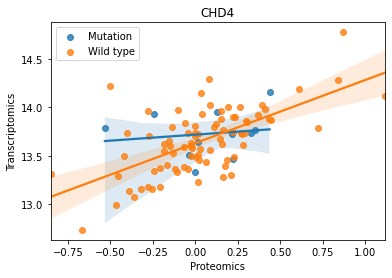

In [11]:
for index, df in enumerate(en_mutation_effects['gene_dataframes'][0:10]):
    is_mt = df['Type'] =='mutation'
    is_wt = df['Type'] == 'wt'
    ax = sns.regplot( x = 'Proteomics', y= 'Transcriptomics',  data = df[is_mt], label = "Mutation")
    ax = sns.regplot( x = 'Proteomics', y= 'Transcriptomics',  data = df[is_wt], label = "Wild type")
    ax.legend(loc="best")
    plt.title(en_mutation_effects['gene'][index])
    plt.show()


In [12]:
wt_corr = []
mut_corr = []
filtered_genes = []
gene_dfs = []
for gene in genes:
    gen_cor, wt_cor, gene_df = find_mutation_corr_effect(en, gene, corr_dif=False)
    if not np.isnan(gen_cor):
        wt_corr.append(wt_cor)
        mut_corr.append(gen_cor)
        filtered_genes.append(gene)
        gene_dfs.append(gene_df)
en_mutation_effects = pd.DataFrame({'gene': filtered_genes, 'wild_type_correlation': wt_corr, "mutation_correlation" : mut_corr, "gene_dataframes": gene_dfs})
en_mutation_effects.head()

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ABCA12 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ABCA13 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ACVR2A (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ADGRG4 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ADGRV1 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: FMN2 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: FSIP2 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: HECW1 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: HYDIN (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: IGFN1 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ZNF469 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ZNF536 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ZNF559 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ZNF729 (<ipython-input-3-dd3b2f33840f>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ZNF831 (<ipython-input-3-dd3b2f33840f>, line 2)


,gene,wild_type_correlation,mutation_correlation,gene_dataframes
0,AHNAK,0.126240,0.070727,Type Proteomics Transcriptomics 0 wt ...
1,AHNAK2,0.155454,0.093237,Type Proteomics Transcriptomics 0 ...
2,ANK1,0.004749,0.060565,Type Proteomics Transcriptomics 0 ...
3,ANK2,-0.229408,0.192810,Type Proteomics Transcriptomics 0 wt ...
4,ANK3,-0.063598,0.035378,Type Proteomics Transcriptomics 0 ...


In [13]:
# calculate fisher-z transformation
en_mutation_effects_z = en_mutation_effects.assign(wt_z = np.arctanh(en_mutation_effects['wild_type_correlation']),mut_z = np.arctanh(en_mutation_effects['mutation_correlation']))


C:\Users\nanel\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
en_mutation_effects_z.head()

,gene,wild_type_correlation,mutation_correlation,gene_dataframes,wt_z,mut_z
0,AHNAK,0.126240,0.070727,Type Proteomics Transcriptomics 0 wt ...,0.126917,0.070845
1,AHNAK2,0.155454,0.093237,Type Proteomics Transcriptomics 0 ...,0.156725,0.093509
2,ANK1,0.004749,0.060565,Type Proteomics Transcriptomics 0 ...,0.004749,0.060639
3,ANK2,-0.229408,0.192810,Type Proteomics Transcriptomics 0 wt ...,-0.233565,0.195254
4,ANK3,-0.063598,0.035378,Type Proteomics Transcriptomics 0 ...,-0.063684,0.035393


https://www.real-statistics.com/correlation/two-sample-hypothesis-testing-correlation/

In [15]:
p_vals = []
for i, row in en_mutation_effects_z.iterrows():
    df = row['gene_dataframes']
    is_mt = df['Type'] =='mutation'
    is_wt = df['Type'] == 'wt'
    n_mt = len(df[is_mt])
    n_wt = len(df[is_wt])
    s = math.sqrt(1/(n_mt -3) + 1/(n_wt-3))
    z = (row['mut_z'] - row['wt_z']) / s
    pval = 2 * (1 - scipy.stats.norm.cdf(abs(z))) #two-sided p test
    p_vals.append(pval)
en_mutation_effects_z['p_val'] = p_vals

C:\Users\nanel\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


In [16]:
en_mutation_effects_z_sorted = en_mutation_effects_z.sort_values(by='p_val', ascending=True, ignore_index=True)
en_mutation_effects_z_sorted.head()

,gene,wild_type_correlation,mutation_correlation,gene_dataframes,wt_z,mut_z,p_val
0,ATRX,-0.425650,0.838282,Type Proteomics Transcriptomics 0 wt ...,-0.454572,1.215365,0.000007
1,ARID1B,-0.161185,0.892770,Type Proteomics Transcriptomics 0 ...,-0.162603,1.435412,0.000016
2,SPEG,-0.337768,0.812479,Type Proteomics Transcriptomics 0 ...,-0.351571,1.134279,0.000161
3,DYSF,-0.399844,0.588586,Type Proteomics Transcriptomics 0 ...,-0.423463,0.675500,0.000644
4,ARID1A,-0.285938,0.347732,Type Proteomics Transcriptomics 0 ...,-0.294137,0.362861,0.002048


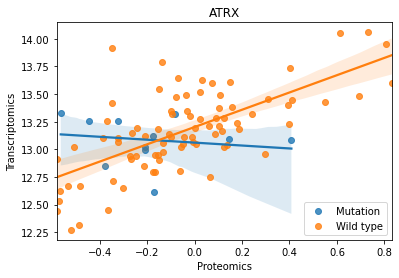

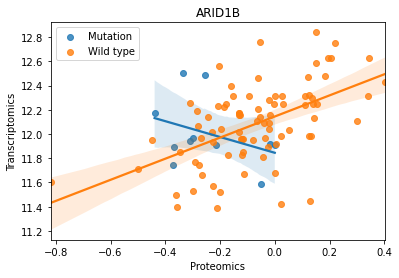

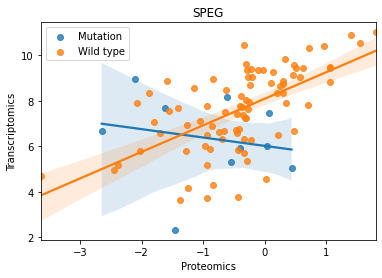

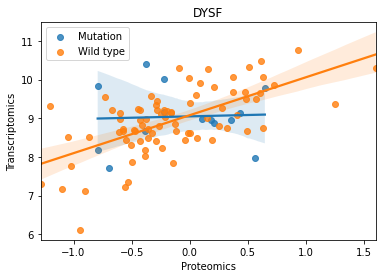

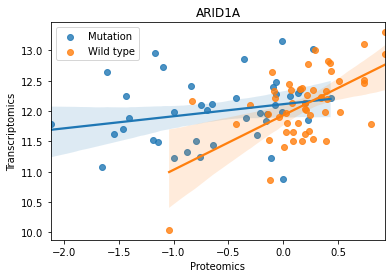

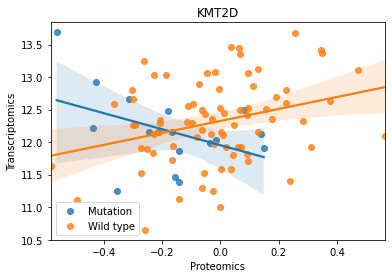

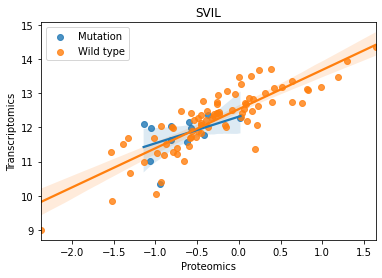

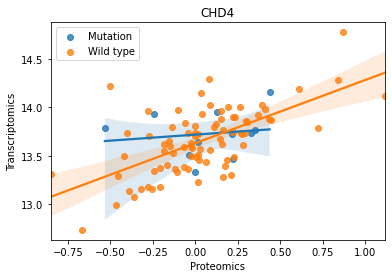

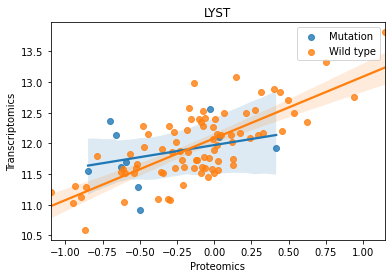

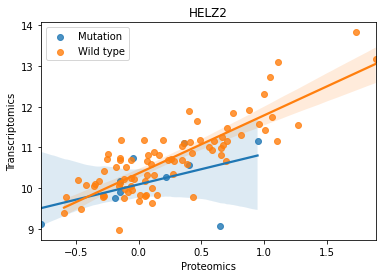

In [17]:
for index, df in enumerate(en_mutation_effects_z_sorted['gene_dataframes'][0:10]):
    is_mt = df['Type'] =='mutation'
    is_wt = df['Type'] == 'wt'
    ax = sns.regplot( x = 'Proteomics', y= 'Transcriptomics',  data = df[is_mt], label = "Mutation")
    ax = sns.regplot( x = 'Proteomics', y= 'Transcriptomics',  data = df[is_wt], label = "Wild type")
    ax.legend(loc="best")
    plt.title(en_mutation_effects_z_sorted['gene'][index])
    plt.show()
